## Table of Contents
* [Introduction](#chapter1)
    * [Description](#section1_1)
    * [Main aims](#section1_2)
    * [Data description](#section1_3)
* [Preparation](#chapter2)
    * [Importing libs](#section2_1)
    * [Data import, research and preparation](#section2_2) 
* [Exploratory data analysis](#chapter3)
    * [Apartment parameters](#section3_1)
    * [Speed of apartment sale](#section3_2)
    * [Apartment Parameters Observations](#section3_3)
    * [Factors affecting the price of apartment](#section3_4)
    * [Average price in the top 10 locations with the most number of ads](#section3_5)
        * [Top 10 locations with the largest number of ads and the price of one square meter in each of the locations ](#sub_section3_5_1)
        * [Locations with the highest cost per square meter](#sub_section3_5_2)
        * [Locations with the lowest cost per square meter](#sub_section3_5_3)
    * [The price of apartments in St. Petersburg depending on the distance from the center](#section3_6)    
* [Results](#chapter4)        

# 1. Introduction <a class="anchor" id="chapter1"></a>

### 1.1 Description <a class="anchor" id="section1_1"></a>

At our disposal is the data sample of the Yandex.Realty service - an archive of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years.

### 1.2 Main aims: <a class="anchor" id="section1_2"></a>
We need to learn how to determine the market value of real estate. Our job is to set the parameters. This will allow to build an automated system: it will track anomalies and fraudulent activity.

### 1.3 Data description <a class="anchor" id="section1_3"></a>

Two types of data are available for each apartment for sale. The first ones are entered by the user, the second ones are obtained automatically on the basis of cartographic data. For example, the distance to the center, airport, nearest park and reservoir.

Dataset includes:
- `airports_nearest` — distance to the nearest airport in meters (m)
- `balcony` — number of balconies
- `ceiling_height` — ceiling height (m)
- `cityCenters_nearest` — distance to city center (m)
- `days_exposition` — number of days the ad was posted (from publication to removal)
- `first_day_exposition` — exposition date
- `floor` — floor
- `floors_total` — floors in the building
- `is_apartment` — apartments (boolean)
- `kitchen_area` — kitchen area in square meters (m²)
- `last_price` — price at the time of removal from publication
- `living_area` — living area in square meters (m²)
- `locality_name` — locality name
- `open_plan` — free layout (boolean type)
- `parks_around3000` — number of parks within a 3 km radius
- `parks_nearest` — distance to nearest park (m)
- `ponds_around3000` — number of water bodies within a radius of 3 km
- `ponds_nearest` — distance to the nearest body of water (m)
- `rooms` — number of rooms
- `studio` — studio type (boolean)
- `total_area` — total area of the apartment in square meters (m²)
- `total_images` — number of photos of the apartment in the ad

# 2. Preparation <a class="anchor" id="chapter2"></a>

### 2.1 Importing libs <a class="anchor" id="section2_1"></a>

In [1]:
import pandas as pd
import re as re
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
nan = np.nan

### 2.2 Data import, research and preparation <a class="anchor" id="section2_2"></a>

In [2]:
# Let's import ouor dataset 
url = 'https://raw.githubusercontent.com/AntonMiniazev/YaP_projects/main/Real_estate_market_analysis/real_estate_data.csv'
df = pd.read_csv(url, sep='\t', decimal = '.')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
# Exploring info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**There are a few issues with data, which should be corrected:**
<ul>
 <li>first_day_exposition - type object should be changed into date;</li>
 <li>last_price и total_area - type float64 should be changed into int32;</li>    
 <li>is_apartment - 20924  apartments doesn't have an attribute, can be set as False. Probably, landowners would have indicated belonging to the apartment.</li>
 <li>balcony - lack of data may indicate a lack of balconies. Gaps can be replaced with 0;</li>
 <li>locality_name - the absence of a settlement will be grouped into other;</li>
 <li>last_price - there are outliers with the price of 12190 RUB (index 8793). It is likely that the price is indicated in thousand rubles and it needs to be fixed;</li>  
 <li>airports_nearest - there are outliners with a distance of 0 meters (index 21085). It is likely that the data was not found and 0 was entered instead of a gap;</li>     
 </ul>

In [4]:
# Applying corrections
df['is_apartment'].fillna(False, inplace = True)
df['balcony'].fillna(0, inplace = True)
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')
df['locality_name'].fillna('Прочее', inplace = True)
df = df.astype({'last_price': 'int32', 'total_area': 'int32'})
df.loc[8793,'last_price'] = 12190000
df.loc[21085,'airports_nearest'] = np.nan

In [5]:
# Check locality names
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

* Locality names have a common problem with duplicates due to different spellings of the word "посёлок". There may also be different options for types of settlements. For analysis, the names of the settlements themselves will be separated by upper case.

In [6]:
# Checking the number of localities
len(df['locality_name'].unique())

365

In [7]:
# Function to separate type of the settlement from its name by ' ' 
def cap_word(name):
    result = re.findall(r"\b[А-Я]\w+[-,\s]?\w+", name)
    return result[0]

In [8]:
# Applying the separation
df['locality_name_unique']=df['locality_name'].apply(lambda cw : cap_word(cw))

In [9]:
# Checking again the number of localities
len(df['locality_name_unique'].unique())

306

* It is worth paying attention to apartments with low and high ceilings, which stand out from the general sample:

In [10]:
# Exploring ceiling heights
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

<Axes: >

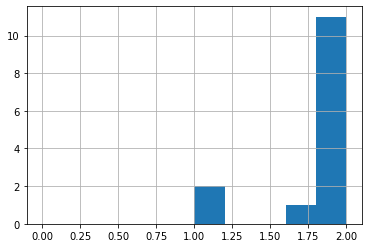

In [11]:
df['ceiling_height'].hist(bins=10,range=(0,2))

<Axes: >

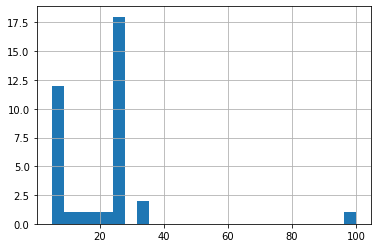

In [12]:
df['ceiling_height'].hist(bins=25,range=(5,100))

**According to the height of the ceilings, the following conclusions can be drawn:**
<ul>
 <li>Below 2 meters - probably entered areas that are not related to apartments or errors when entering a value. Can be excluded;</li>
 <li>Among apartments over 6 meters, there are those that are probably entered with an error in their order: from 20 to 40 meters are actually included in the group from 2 to 4 meters. The remaining apartments over 6 meters can be attributed to errors and excluded.</li>
  <li>Apartments from 3.5 to 6 meters - most likely these are apartments with a non-standard height, can be left as they are and filtered further if necessary.</li>
  <li>After processing the ceiling heights, we can apply the median to the null values to flatten the sample.</li>
</ul>

#### Changinig of ceiling area and number of rooms

In [13]:
height_for_change = df.query('ceiling_height >= 20 and ceiling_height <= 40')

#Apartments with ceiling area of 20-40 meters - dividing by 10
df['ceiling_height_good'] = df['ceiling_height'].where(~df.index.isin(height_for_change.index), df['ceiling_height']/10) 

too_low_height = df.query('ceiling_height_good < 2.5')

#Apartments with ceiling area less than 2.5 meters - excluding outliners as inconsistent with building codes and regulations
df = df.drop(too_low_height.index)

too_big_height = df.query('ceiling_height_good > 6')

#Apartments with ceilings over 6 meters - excluding
df = df.drop(too_big_height.index)

#Apartments with ceilings without data - inserting the most popular value usind mode()
df['ceiling_height_good'].fillna(df['ceiling_height_good'].mode(),inplace=True)

<Axes: >

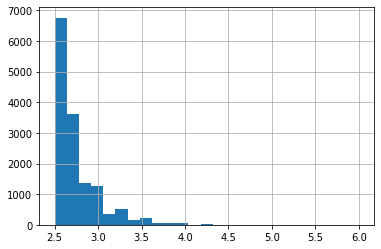

In [14]:
# let's see the distribution of an updated ceiling height date
df['ceiling_height_good'].hist(bins=25)

* The sample also includes apartments with 0 rooms and different sizes. Most likely this is an error occured during entering the number of rooms and such apartments should be excluded.

<Axes: >

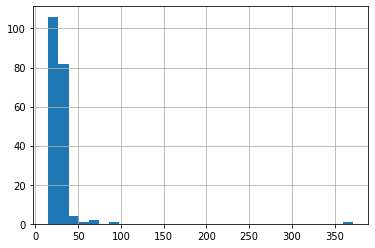

In [15]:
df[df['rooms'] == 0]['total_area'].hist(bins=30)

In [16]:
#Apartments with 0 rooms - excluding
zero_rooms = df.query('rooms == 0')
df = df.drop(zero_rooms.index)

<Axes: >

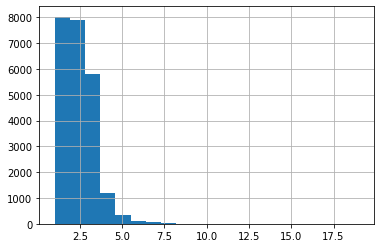

In [17]:
df['rooms'].hist(bins=20)

In [18]:
#### Filling kitchen area and living area with average values

In [19]:
def kitchen_check(row):
    living_area = row['living_area']
    total_area = row['total_area']
    kitchen_area = row['kitchen_area']
    
    if total_area < (living_area+kitchen_area):
        return 'kitchen_not_separated'
    else:
        return 'kitched_separated'

In [20]:
df['kitchen_check'] = df.apply(kitchen_check,axis=1)

In [21]:
df['kitchen_area'].describe()

count    21347.000000
mean        10.578675
std          5.910689
min          1.300000
25%          7.000000
50%          9.170000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [22]:
# Calculating average share of kitchen area in apartments
df_kitchen_area = df.query('kitchen_area >0 and kitchen_check == "kitched_separated"')
kitchen_area_ratio = df_kitchen_area['kitchen_area'].sum()/df_kitchen_area['total_area'].sum()
kitchen_area_ratio

0.17433521219901799

In [23]:
empty_kitchen = df.query('kitchen_area.isna()', engine='python')

#Apartments without kitchen area - multiply the total area by the average share of the kitchen for apartments with a separated kitchen
df['kitchen_area'] = df['kitchen_area'].where(~df.index.isin(empty_kitchen.index), df['total_area']*kitchen_area_ratio) 

In [24]:
df['living_area'].describe()

count    21536.000000
mean        34.607249
std         22.094982
min          2.000000
25%         18.700000
50%         30.000000
75%         42.500000
max        409.700000
Name: living_area, dtype: float64

In [25]:
# Calculating average share of living area in apartments
df_living_area = df.query('living_area >0')
living_area_ratio = df_living_area['living_area'].sum()/df_living_area['total_area'].sum()
living_area_ratio

0.5751259644970688

In [26]:
empty_living = df.query('living_area.isna()', engine='python')

#Apartments without living area - multiply the total area by the average share of the living rooms
df['kitchen_area'] = df['kitchen_area'].where(~df.index.isin(empty_kitchen.index), df['total_area']*kitchen_area_ratio) 
df['living_area'] = df['living_area'].where(~df.index.isin(empty_living.index), df['total_area']*living_area_ratio) 

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23419 entries, 0 to 23698
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23419 non-null  int64         
 1   last_price            23419 non-null  int32         
 2   total_area            23419 non-null  int32         
 3   first_day_exposition  23419 non-null  datetime64[ns]
 4   rooms                 23419 non-null  int64         
 5   ceiling_height        14339 non-null  float64       
 6   floors_total          23336 non-null  float64       
 7   living_area           23419 non-null  float64       
 8   floor                 23419 non-null  int64         
 9   is_apartment          23419 non-null  bool          
 10  studio                23419 non-null  bool          
 11  open_plan             23419 non-null  bool          
 12  kitchen_area          23419 non-null  float64       
 13  balcony         

#### Intermediate conclusions:
For an accurate analysis, it was necessary to correct the issues in the data that were caused by:
- Lack of data;
- Input errors;
- Incorrect data types;
- Duplicates.

#### Adding new auxiliary columns

* Price per meter

In [28]:
df['price_per_m'] = df['last_price']/df['total_area']

* Advertisement day of week:

In [29]:
df['weekday'] = df['first_day_exposition'].dt.dayofweek+1

* Advertisement month:

In [30]:
df['month'] = df['first_day_exposition'].dt.month

* Advertisement year:

In [31]:
df['year'] = df['first_day_exposition'].dt.year

* Apartment floor type:

In [32]:
# Function, which sets a floor type
def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == floors_total:
        return 'last'
    elif floor == 1:
        return 'groud'
    elif math.isnan(floors_total):
        return 'no_data'
    else:
        return 'other'

In [33]:
df['floor_type'] = df.apply(floor_type,axis=1)

* Distance to the city center in kilometers:

In [34]:
df['cityCenters_nearest_km'] = df['cityCenters_nearest']/1000
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].round(0)

# 3. Exploratory data analysis <a class="anchor" id="chapter3"></a>

### 3.1 Apartment parameters <a class="anchor" id="section3_1"></a>

count    23419.000000
mean        60.423588
std         35.667597
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64


<Axes: >

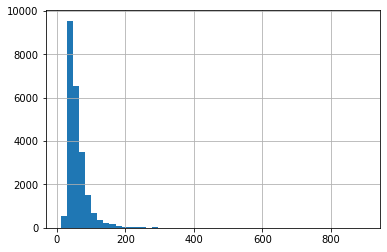

In [35]:
# Total area
print(df['total_area'].describe())
df['total_area'].hist(bins=50)

count    23419.000000
mean        34.751174
std         22.408224
min          2.000000
25%         19.000000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64


<Axes: >

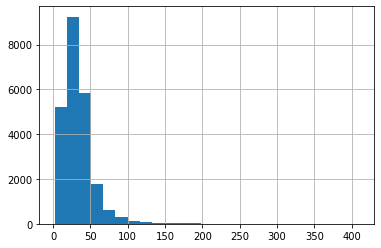

In [36]:
# Living area
print(df['living_area'].describe())
df['living_area'].hist(bins=25)

count    23419.000000
mean        10.553207
std          6.034044
min          1.300000
25%          7.000000
50%          9.065431
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


<Axes: >

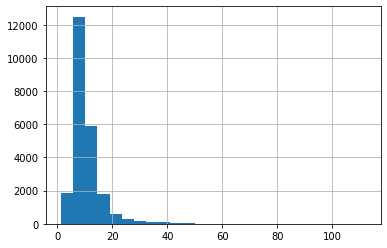

In [37]:
# Kitchen area
print(df['kitchen_area'].describe())
df['kitchen_area'].hist(bins=25)

count        23419.00
mean       6578057.67
std       10936196.35
min         430000.00
25%        3450000.00
50%        4650000.00
75%        6800000.00
max      763000000.00
Name: last_price, dtype: object


<Axes: >

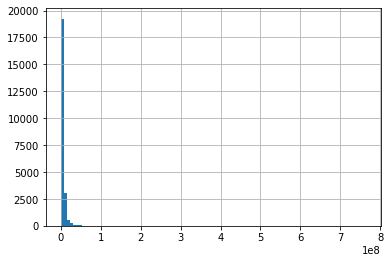

In [38]:
# Price of apartment
print(df['last_price'].describe().apply("{0:.2f}".format))
df['last_price'].hist(bins=100)

count    23419.000000
mean         2.088390
std          1.066798
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


<Axes: >

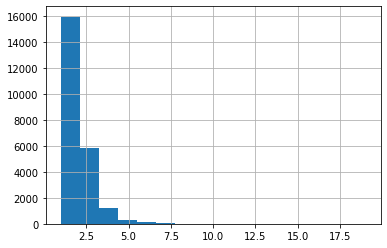

In [39]:
# Number of rooms
print(df['rooms'].describe())
df['rooms'].hist(bins=16)

count    14339.000000
mean         2.728096
std          0.277065
min          2.500000
25%          2.520000
50%          2.650000
75%          2.800000
max          6.000000
Name: ceiling_height_good, dtype: float64


<Axes: >

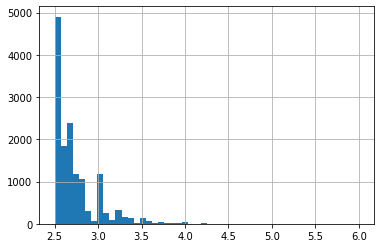

In [40]:
# Ceiling height
print(df['ceiling_height_good'].describe())
df['ceiling_height_good'].hist(bins=50)

count    23419.000000
mean         5.874205
std          4.869557
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


<Axes: >

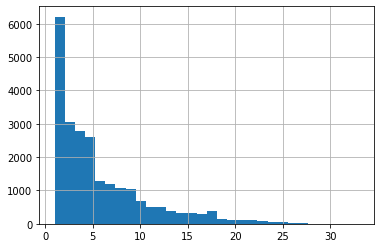

In [41]:
# Floor
print(df['floor'].describe())
df['floor'].hist(bins=30)

count     23419
unique        4
top       other
freq      17147
Name: floor_type, dtype: object


<Axes: >

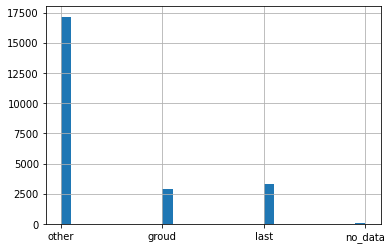

In [42]:
# Floor type
print(df['floor_type'].describe())
df['floor_type'].hist(bins=30)

count    23336.000000
mean        10.631642
std          6.572239
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


<Axes: >

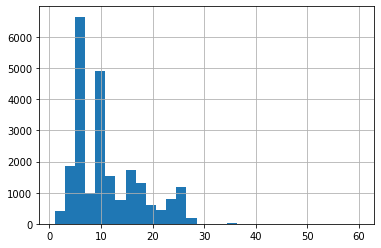

In [43]:
# Overall number of floors in each building
print(df['floors_total'].describe())
df['floors_total'].hist(bins=30)

count    18011.000000
mean     14193.597579
std       8627.504837
min        181.000000
25%       9234.000000
50%      13092.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


<Axes: >

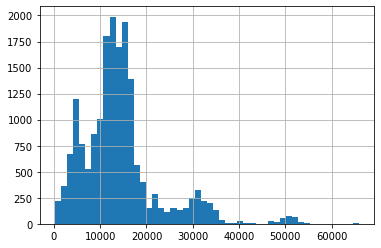

In [44]:
# Distance to the city center in kilometers:
print(df['cityCenters_nearest'].describe())
df['cityCenters_nearest'].hist(bins=50)

count    17987.000000
mean     28828.571579
std      12627.441248
min       6450.000000
25%      18616.000000
50%      26765.000000
75%      37310.000000
max      84869.000000
Name: airports_nearest, dtype: float64


<Axes: >

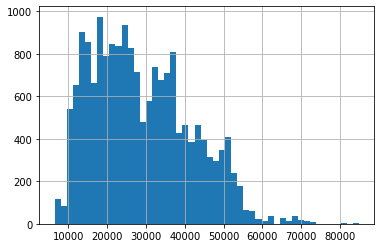

In [45]:
# Distance to the neares airport:
print(df['airports_nearest'].describe())
df['airports_nearest'].hist(bins=50)

count    8019.000000
mean      490.427111
std       342.897516
min         1.000000
25%       287.000000
50%       453.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


<Axes: >

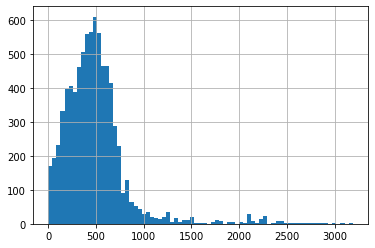

In [46]:
# Distance to the nearest park
print(df['parks_nearest'].describe())
df['parks_nearest'].hist(bins=75)

count    23419.000000
mean         3.568342
std          1.789496
min          1.000000
25%          2.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: weekday, dtype: float64


<Axes: >

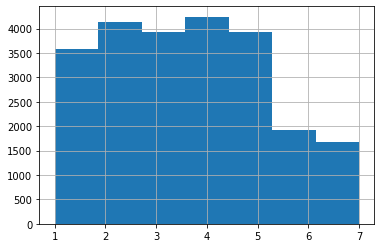

In [47]:
# Advertisement weekday
print(df['weekday'].describe())
df['weekday'].hist(bins=7)

count    23419.000000
mean         6.393270
std          3.490834
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64


<Axes: >

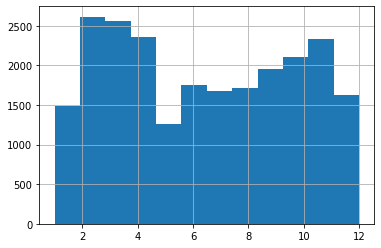

In [48]:
# Advertisement month
print(df['month'].describe())
df['month'].hist(bins=12)

### 3.2 Speed of apartment sale <a class="anchor" id="section3_2"></a>

count    20263.000000
mean       181.637023
std        220.293144
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


<Axes: >

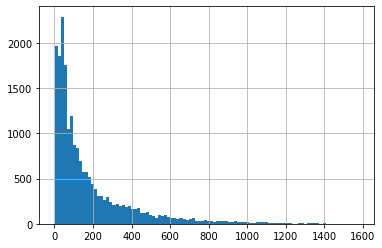

In [49]:
print(df['days_exposition'].describe())
df['days_exposition'].hist(bins=100)

In [50]:
per_list = [10,15,20,85,90,95]
for i in per_list:
    print(i,'% of apartments were sold in first',np.percentile(df[df['days_exposition']>0]['days_exposition'],i).round(), 'days since exposition')


10 % of apartments were sold in first 17.0 days since exposition
15 % of apartments were sold in first 26.0 days since exposition
20 % of apartments were sold in first 35.0 days since exposition
85 % of apartments were sold in first 365.0 days since exposition
90 % of apartments were sold in first 462.0 days since exposition
95 % of apartments were sold in first 649.0 days since exposition


### 3.3 Apartment Parameters Observations: <a class="anchor" id="section3_3"></a>

<ol>
<li><b>Total area:</b></li>
    Most of the observed apartments have an area within 50 m2. The largest apartment has 900 m2, and the smallest is only 12. The entire observed dataset has the total area data.
<li><b>Living space:</b></li>
    The average living area is 35 m2 and 75% of the apartments have a living area up to 42.5 m2. The largest living area in the apartments is 410 m2, while the minimum is only 2 m2. Some of the apartments did not have a specified living area, and it was supplemented through the average ratio of living area to total area.
<li><b>Kitchen area:</b></li>
    On average, kitchens have an area of 10.5 m2, while almost half of the apartments have kitchens within 9 m2, and the largest kitchen has an area of 112 m2. Some of the apartments did not have the specified kitchen area, and it was supplemented through the average ratio of the kitchen area to the total area.
<li><b>Object price:</b></li>
    The most expensive apartment is estimated at 763 million rubles, while half of the apartments cost up to 4.65 million rubles. An apartment with a minimum cost of 12190 is probably entered with an error in the data (corrected at the first stages), while all observed apartments have a price.
<li><b>Number of rooms:</b></li>
    Half of the apartments have 1 or 2 rooms, with an approximately equal number of such options in the sample. The largest number of rooms has an apartment with 19. The entire observed dataset has the number of rooms data.
<li><b>Ceiling height:</b></li>
    Most of the apartments have a minimum ceiling height for apartments - 2.5 meters. Most apartments do not have ceiling heights.
<li><b>Apartment floor:</b></li>
    Most of the apartments are located on the first 4 floors, and the most frequent floor in the dataset is the second. The highest located apartment is the object on the 33rd floor.
<li><b>Apartment floor type (“first”, “last”, “other”):</b></li>
    Most of the apartments are not located on the first or last floor, and a few apartments do not have any values for the total number of floors in the building, which led to the "no data" group.
<li><b>The total number of floors in the house:</b></li>
    Most often there are apartments in houses with 5 floors, and half of the apartments are located in buildings with less than 10 floors. Several apartments do not have the number of floors in the building data.
<li><b>Distance to the city center in meters:</b></li>
    About half of the apartments are located 10-16 kilometers from the city center with an average of 14.193 kilometers. A significant share of apartments do not have the distance from the center data.
<li><b>Distance to nearest airport:</b></li>
    The apartments are mostly located between 18 and 38 kilometers from the airport with an average distance of 28.828 kilometers. A significant proportion of apartments do not have distance from the airport data.
<li><b>Distance to nearest park:</b></li>
    Most of the apartments are located 280-610 meters from the nearest park, while the sample includes apartments located right up to the park. Most of the apartments do not have the distance from the nearest park data.
<li><b>The day and month the advertisement was posted.</b></li> 
    The least number of ads were published on weekends, and among the months the least number of ads were published in January, May and December.
<li><b>Speed of apartment sale.</b></li> 
    On average, apartments on the list were sold within 182 days, with half of the apartments sold in less than 96 days.
Considering that 85% of apartments are sold within 365 days from publication, we can estimate the normal period of 1 year from the date of publication, and the period beyond - unusually long up to 650 days, after which only 5% of the apartments were sold.
During the first 17 days from the publication, 10% of the apartments were sold and 20% in first 35 days. Thus, a sale in the first month of publication can be assessed as a quick sale.    
</ol>


### 3.4 Factors affecting the price of apartment <a class="anchor" id="section3_4"></a>

In [51]:
# Adding price in millions of rubles
df['last_price_mln'] = df['last_price']/(10**6)

<Axes: xlabel='last_price_mln', ylabel='total_area'>

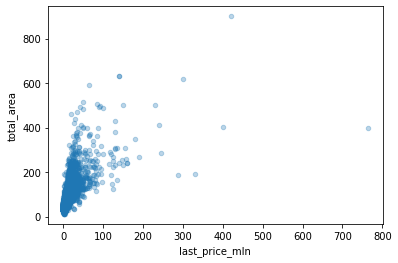

In [52]:
# Lookin at distribution of apartments depending on their total area and last price
df.plot(x='last_price_mln', y='total_area', kind='scatter', alpha=0.3) 

* The sample is represented by apartments mainly up to 50 million rubles and 200 square meters. It is worth considering this group in more detail to analyze the impact of all indicators.

In [53]:
# Selecting the group of apartments
df_wo_largest = df.query('last_price_mln < 50 and total_area <200')
df_wo_largest.shape[0]

23134

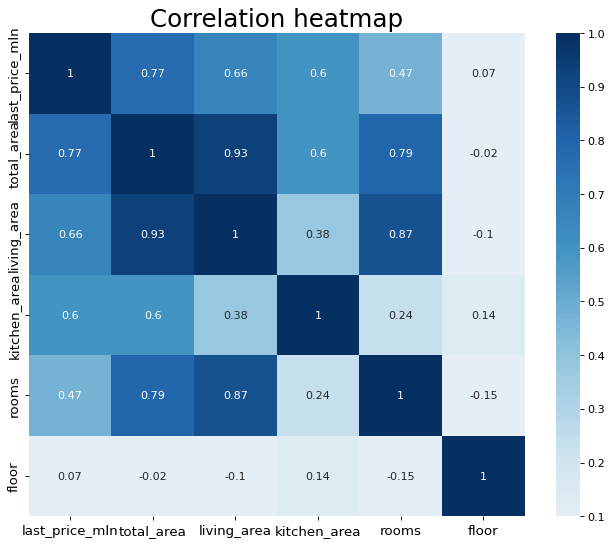

In [54]:
# Making correlation matrix
df_corr = df_wo_largest[['last_price_mln', 'total_area', 'living_area', 'kitchen_area','rooms','floor']]
corr_m = round(df_corr.corr(),2)

# Drawing correlation heatmap
plt.figure(figsize=(10,8), dpi= 80)
sns.heatmap(corr_m, xticklabels=df_corr.corr().columns, yticklabels=corr_m.columns,vmin=0.1, vmax=1, cmap='RdBu', center=0, annot=True)

plt.title('Correlation heatmap', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<Axes: xlabel='last_price_mln', ylabel='total_area'>

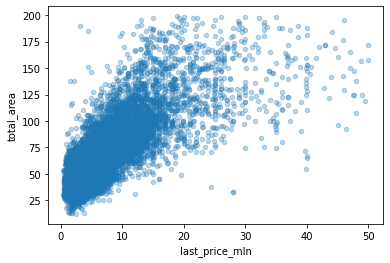

In [55]:
# Looking closely on its distribution
df_wo_largest.plot(x='last_price_mln', y='total_area', kind='scatter', alpha=0.3) 

In [56]:
# Calculating correlation between total area and last price
df_wo_largest['last_price_mln'].corr(df_wo_largest['total_area'])

0.7672192378364318

* The correlation coefficient **0.767** is high enough to conclude that the attributes are highly correlated.

<Axes: xlabel='last_price_mln', ylabel='living_area'>

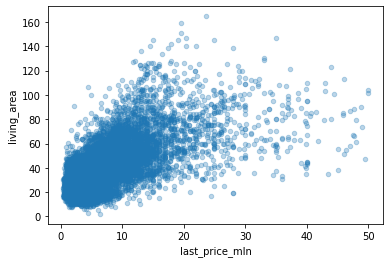

In [57]:
# Lookin at distribution of apartments depending on their living area and last price
df_wo_largest.plot(x='last_price_mln', y='living_area', kind='scatter', alpha=0.3)

In [58]:
# Calculating correlation between living area and last price
df_wo_largest['last_price_mln'].corr(df_wo_largest['living_area'])

0.6604393692359856

* The correlation coefficient **0.66** shows the possible presence of a relationship between the living area and the price of the object, while it is clear that the price is formed more by the total area.

<Axes: xlabel='last_price_mln', ylabel='kitchen_area'>

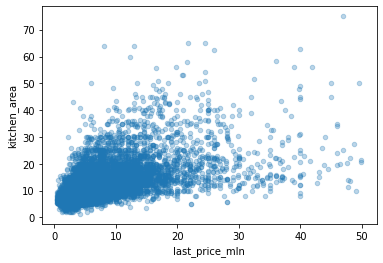

In [59]:
# Lookin at distribution of apartments depending on their kitchen area and last price
df_wo_largest.plot(x='last_price_mln', y='kitchen_area', kind='scatter', alpha=0.3)

In [60]:
# Calculating correlation between kitchen area and last price
df_wo_largest['last_price_mln'].corr(df_wo_largest['kitchen_area'])

0.603576271214415

* The correlation coefficient **0.603** shows the possible relationship between the area of the kitchen and the price of the object. Apartments can have a large total area with a small kitchen and the price will be higher than smaller apartments with a larger kitchen area.

<Axes: xlabel='last_price_mln', ylabel='rooms'>

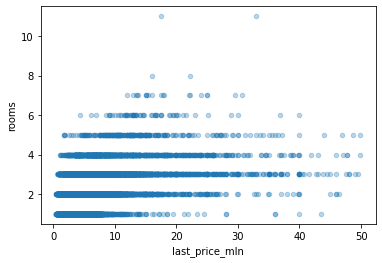

In [61]:
# Lookin at distribution of apartments depending on their rooms and last price
df_wo_largest.plot(x='last_price_mln', y='rooms', kind='scatter', alpha=0.3)

In [62]:
# Calculating correlation between number of rooms and last price
df_wo_largest['last_price_mln'].corr(df_wo_largest['rooms'])

0.469847129286977

* The correlation coefficient **0.469** shows a weak relationship between the number of rooms and the price of an object. 4 small rooms will certainly cost less than 2 large ones.

In [63]:
# Checking the median price of apartments from different floor type groups
df_floor_types = df_wo_largest[df_wo_largest['floor_type'] != 'no data'].pivot_table(index='floor_type',values='last_price_mln',aggfunc=['median'])
df_floor_types.columns = ['median_price']
df_floor_types

,median_price
floor_type,
groud,3.900000
last,4.250000
no_data,5.380992
other,4.830000


* The median price of sold apartments from the ground floor is lower than that of apartments located above. At the same time, apartments on the top floor are cheaper than those located between the first and the last.

In [64]:
# Exploring dependency of weekdays and selling price
df_days = df_wo_largest.pivot_table(index='weekday',values='last_price_mln',aggfunc=['median', 'count'])
df_days.columns = ['median_price', 'count']
df_days

,median_price,count
weekday,,
1,4.640,3535
2,4.740,4102
3,4.695,3874
4,4.600,4176
5,4.590,3890
6,4.506,1896
7,4.550,1661


<Axes: xlabel='weekday'>

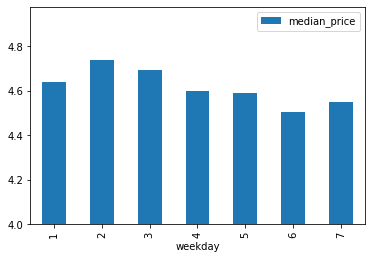

In [65]:
df_days.plot.bar(y='median_price',ylim = 4)

* Apartments on ads placed on Tuesday had an average higher sale price than on other days.

In [66]:
# Exploring dependency of months and selling price
df_months = df_wo_largest.pivot_table(index='month',values='last_price_mln',aggfunc=['median', 'count'])
df_months.columns = ['median_price', 'count']
df_months

,median_price,count
month,,
1,4.60,1461
2,4.65,2586
3,4.65,2534
4,4.78,2328
5,4.50,1244
6,4.40,1728
7,4.60,1650
8,4.60,1699
9,4.69,1923


<Axes: xlabel='month'>

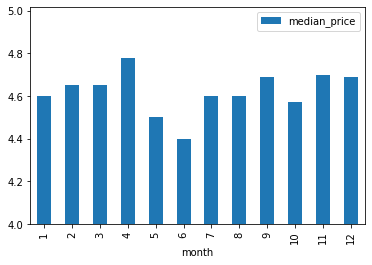

In [67]:
df_months.plot.bar(y='median_price',ylim = 4)

* Apartments published in April have on average a higher sale price than those published in other months. At the same time, in May and June, there is a general decline in the publication of ads and the lowest selling prices.

In [68]:
# Exploring dependency of years and selling price
df_year = df_wo_largest.pivot_table(index='year',values='last_price_mln',aggfunc=['median', 'count'])
df_year.columns = ['median_price', 'count']
df_year

,median_price,count
year,,
2014,7.500,133
2015,5.200,1145
2016,4.500,2726
2017,4.500,7959
2018,4.581,8349
2019,5.030,2822


<Axes: xlabel='year'>

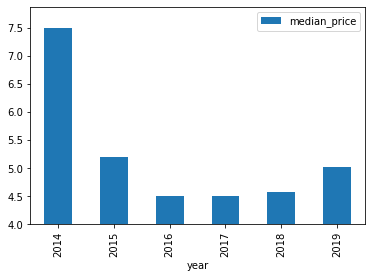

In [69]:
df_year.plot.bar(y='median_price',ylim = 4)

* Among the ads by year, the highest prices were for apartments whose ads were published in 2014, while there were only 133 of them. With the increase in the number of ads, the average price decreased to 4.5 million rubles.

#### Conclusions on the influence of factors on the total cost:
- Among the investingated attributes, the highest correlation was shown by the total and living areas, that is, indicators that traditionally determine the cost of an apartment;
- At the same time, the presence of a larger number of rooms does not always explain the high price of the apartment due to the fact that the rooms can be small and give a smaller total area;
- The most expensive apartments were those located between the first and last floor;
- Tuesday and Wednesday turned out to be the most valuable for posting ads - on average, ads are published on these days for apartments that are sold more expensive than other days;
- The most expensive apartments were sold, whose ads were published in April, and the largest decline in price occurred in May and June;
- Since 2014, there has been a negative correlation between the price and the number of publications - accordingly, the share of premium housing on the service is eroded and the average price falls to the general level.

### 3.5 Average price in the top 10 locations with the most number of ads <a class="anchor" id="section3_5"></a>

In [70]:
# Extracting number of ads with average prices
df_prices = df.pivot_table(index='locality_name_unique',values=['last_price_mln', 'total_area'],aggfunc={'last_price_mln':['sum','count'], 'total_area':'sum'})
df_prices.columns = ['count', 'last_price_mln', 'total_area']

In [71]:
# Adding price per square meter
df_prices['avg_m2_price'] = df_prices['last_price_mln']/df_prices['total_area']*(10**6)
df_prices = df_prices.astype({'avg_m2_price': 'int64'})

#### 3.5.1 Top 10 locations with the largest number of ads and the price of one square meter in each of the locations <a class="anchor" id="sub_section3_5_1"></a>

In [72]:
df_prices.sort_values(by='count',ascending=False).head(10)

,count,last_price_mln,total_area,avg_m2_price
locality_name_unique,,,,
Санкт-Петербург,15570,126080.424936,1008769,124984
Мурино,562,2102.762700,25177,83519
Кудрово,450,2000.521760,21202,94355
Шушары,436,1797.605999,23489,76529
Всеволожск,391,1494.699965,21992,67965
Пушкин,366,2373.124264,22490,105519
Колпино,337,1336.739246,17883,74749
Парголово,322,1455.145459,16616,87574
Гатчина,307,1070.919360,15581,68732


#### 3.5.2 Locations with the highest cost per square meter <a class="anchor" id="sub_section3_5_2"></a>

In [73]:
df_prices.sort_values(by='avg_m2_price',ascending=False).head(20)

,count,last_price_mln,total_area,avg_m2_price
locality_name_unique,,,,
Санкт-Петербург,15570,126080.424936,1008769,124984
Зеленогорск,24,150.920100,1303,115825
Репино,4,48.667416,431,112917
Пушкин,366,2373.124264,22490,105519
Лисий Нос,3,12.405000,119,104243
Сестрорецк,183,1160.535140,11558,100409
Мистолово,11,52.471250,524,100135
Левашово,1,4.200000,43,97674
Прочее,49,330.513201,3409,96953


#### 3.5.3 Locations with the lowest cost per square meter <a class="anchor" id="sub_section3_5_3"></a>

In [74]:
df_prices.sort_values(by='avg_m2_price',ascending=False).tail(20)

,count,last_price_mln,total_area,avg_m2_price
locality_name_unique,,,,
Володарское,1,0.799,47,17000
Серебрянский,2,1.485,88,16874
Большой Сабск,1,0.900,54,16666
Чудской Бор,1,0.500,30,16666
Шугозеро,1,0.950,57,16666
Оредеж,3,3.260,197,16548
Фалилеево,2,1.300,81,16049
Почап,1,0.850,53,16037
Ефимовский,3,2.440,157,15541


#### Conclusions on the cost per square meter:
- The most expensive square meters are in St. Petersburg (about 125 thousand rubles per m2);
- Zelenogorsk, Lisiy Nos and Levashovo could be included in the sample of the most expensive square meters due to the small number of ads in these settlements;
- Among the cheapest square meters are settlements with 1-3 ads, which may also indicate the unreliability of data for conclusions on these areas.

### 3.6 The price of apartments in St. Petersburg depending on the distance from the center <a class="anchor" id="section3_6"></a>

In [75]:
# Extracting data
df_spb = df.query("cityCenters_nearest_km > 0 and locality_name == 'Санкт-Петербург'")
df_spb = df_spb.astype({'cityCenters_nearest_km': 'int64'})
df_spb['price_per_center_km'] = (df_spb['last_price']/df_spb['cityCenters_nearest_km']).round()
df_spb['price_per_center_km'].describe().apply("{0:.0f}".format)

count        15482
mean       1378731
std        5771520
min          83333
25%         310000
50%         450000
75%        1000000
max      330000000
Name: price_per_center_km, dtype: object

In [76]:
df_spb.sort_values(by='price_per_center_km')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_unique,ceiling_height_good,kitchen_check,price_per_m,weekday,month,year,floor_type,cityCenters_nearest_km,last_price_mln,price_per_center_km
5961,6,2250000,32,2018-02-27,1,NaN,2.0,16.500000,2,False,False,False,7.000000,0.0,Санкт-Петербург,24006.0,27431.0,0.0,NaN,0.0,NaN,178.0,Санкт-Петербург,NaN,kitched_separated,7.031250e+04,2,2,2018,last,27,2.2500,83333.0
12160,8,2450000,43,2018-08-14,1,2.75,5.0,16.000000,1,True,False,False,7.496414,0.0,Санкт-Петербург,26069.0,29493.0,0.0,NaN,0.0,NaN,8.0,Санкт-Петербург,2.75,kitched_separated,5.697674e+04,2,8,2018,groud,29,2.4500,84483.0
17961,3,1400000,13,2017-12-03,1,2.60,9.0,7.476638,1,False,False,False,2.266358,0.0,Санкт-Петербург,14350.0,15945.0,0.0,NaN,1.0,185.0,410.0,Санкт-Петербург,2.60,kitched_separated,1.076923e+05,7,12,2017,groud,16,1.4000,87500.0
19755,11,2080000,50,2017-07-20,2,2.56,14.0,30.600000,8,False,False,False,7.500000,2.0,Санкт-Петербург,21190.0,22902.0,0.0,NaN,1.0,450.0,14.0,Санкт-Петербург,2.56,kitched_separated,4.160000e+04,4,7,2017,other,23,2.0800,90435.0
8894,3,2099000,23,2018-09-25,1,2.70,16.0,13.227897,10,False,False,False,4.009710,2.0,Санкт-Петербург,19212.0,22637.0,0.0,NaN,1.0,457.0,37.0,Санкт-Петербург,2.70,kitched_separated,9.126087e+04,2,9,2018,other,23,2.0990,91261.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19155,20,160000000,243,2018-11-12,5,NaN,5.0,145.000000,4,False,False,False,33.000000,0.0,Санкт-Петербург,22640.0,555.0,3.0,285.0,1.0,200.0,18.0,Санкт-Петербург,NaN,kitched_separated,6.584362e+05,1,11,2018,other,1,160.0000,160000000.0
12971,19,763000000,400,2017-09-30,7,NaN,10.0,250.000000,10,False,False,False,69.734085,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0,Санкт-Петербург,NaN,kitched_separated,1.907500e+06,6,9,2017,last,4,763.0000,190750000.0
14706,15,401300000,401,2016-02-20,5,NaN,9.0,204.000000,9,False,False,False,24.000000,3.0,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0,Санкт-Петербург,NaN,kitched_separated,1.000748e+06,6,2,2016,last,2,401.3000,200650000.0
22831,18,289238400,187,2019-03-19,2,3.37,6.0,63.700000,6,False,False,False,30.200000,0.0,Санкт-Петербург,22494.0,1073.0,3.0,386.0,3.0,188.0,NaN,Санкт-Петербург,3.37,kitched_separated,1.546729e+06,2,3,2019,last,1,289.2384,289238400.0


<Axes: xlabel='cityCenters_nearest_km', ylabel='price_per_center_km'>

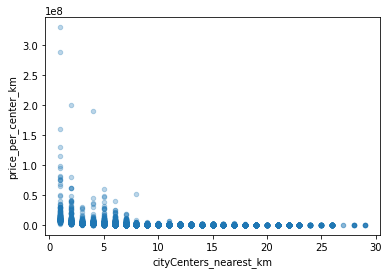

In [77]:
df_spb.plot(x='cityCenters_nearest_km', y='price_per_center_km', kind='scatter', alpha=0.3)

In [78]:
df_spb['last_price'].corr(df_spb['cityCenters_nearest'])

-0.2556050504656766

**Conclusion:** There is a weak negative correlation (**-0.256**) between the price and distance from the center attributes, which means that it poorly describes the price increase with a decrease in the distance to the center. It is likely that the correlation coefficient is influenced by the small number of premium housing in the sample, which is more likely to be located in the center. At the same time, the graph shows that the most expensive apartments are located mainly 5 kilometers from the center.

# 4. Results <a class="anchor" id="chapter4"></a>

Based on the investigated data, it was possible to form some conclusions regarding the residential real estate market of St. Petersburg and the region around: <br>
- Every second apartment is sold on the service within 3 months;
- The cost of an apartment is significantly influenced by its footage, both total and living;
- There is a negative correlation between remoteness and the cost of housing, but for an accurate assessment of the effect, it is necessary to remove the influence of a small number of advertisements for the sale of apartments in the center;
- On the service, with an increase in the number of ads, the average price of apartments for sale decreased with normalization by 2018.